In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Optional
import random

Different Pattern Creating and Matching with the noisy image. Used different distance calculation techniques.

In [3]:
class PatternMatcher:
    """Pattern matching class with various algorithms"""
    def __init__(self):
        self.patterns = []
        self.labels = []
    
    def add_pattern(self, pattern: np.ndarray, label: str):
        '''Adding pattern to database'''
        self.patterns.append(pattern.flatten())
        self.labels.append(label)
    
    def euclidean_dist(self, p1: np.ndarray, p2: np.ndarray) -> float:
        diff = p1 - p2
        return np.sqrt(np.sum(diff * diff))
    
    def manhattan_dist(self, p1: np.ndarray, p2: np.ndarray) -> float:
        return np.sum(np.abs(p1 - p2))
    
    def cos_similarity(self, p1: np.ndarray, p2: np.ndarray) -> float:
        dot_product = np.sum(p1 * p2)
        norm_p1 = np.sqrt(np.sum(p1 * p1))
        norm_p2 = np.sqrt(np.sum(p2 * p2))
        if norm_p1 == 0 or norm_p2 == 0:
            return 0
        return dot_product / (norm_p1 * norm_p2)
    
    def hamming_dist(self, p1: np.ndarray, p2: np.ndarray) -> int:
        return np.sum(p1 != p2)
    
    def match_pattern(self, test_pattern: np.ndarray, method: str = 'euclidean') -> Tuple[str, float]:
        test_flat = test_pattern.flatten()
        
        if method in ['euclidean', 'manhattan', 'hamming']:
            best_score = float('inf')
            better = lambda score, best_score: score < best_score
        elif method == 'cosine':
            best_score = -1
            better = lambda score, best_score: score > best_score
        else:
            raise ValueError(f"Unknown method: {method}")

        best_match = None

        for i, pattern in enumerate(self.patterns):
            if method == 'euclidean':
                score = self.euclidean_dist(test_flat, pattern)
            elif method == 'manhattan':
                score = self.manhattan_dist(test_flat, pattern)
            elif method == 'cosine':
                score = self.cos_similarity(test_flat, pattern)
            elif method == 'hamming':
                bin_test = (test_flat > 0.5).astype(int)
                bin_pattern = (pattern > 0.5).astype(int)
                score = self.hamming_dist(bin_test, bin_pattern)

            if better(score, best_score):
                best_score = score
                best_match = self.labels[i]

        return best_match, best_score

def create_patterns():
    '''Sample patterns for testing'''
    patterns = {}

    plus = np.zeros((7, 7))
    plus[3, :] = 1
    plus[:, 3] = 1
    patterns['plus'] = plus

    square = np.zeros((7, 7))
    square[1:6, 1:6] = 1
    square[2:5, 2:5] = 0
    patterns['square'] = square

    circle = np.zeros((7, 7))
    center = 3
    for i in range(7):
        for j in range(7):
            if 1.5 <= np.sqrt((i-center)**2 + (j-center)**2) <= 2.5:
                circle[i, j] = 1
    patterns['circle'] = circle

    triangle = np.zeros((7, 7))
    for i in range(7):
        for j in range(i, 7-i):
            if i >= 2:
                triangle[i, j] = 1
    patterns['triangle'] = triangle

    return patterns

def test_pattern_matching():
    '''Testing different pattern matching methods'''
    str_heading = "PATTERN MATCHING DEMONSTRATION"
    print(str_heading.center(80, '='))

    matcher = PatternMatcher()

    patterns = create_patterns()
    for label, pattern in patterns.items():
        matcher.add_pattern(pattern, label)
    
    test_patterns = {}
    for label, pattern in patterns.items():
        noisy_pattern = pattern.copy()
        noise = np.random.random(pattern.shape) * 0.3
        noisy_pattern = np.clip(noisy_pattern + noise, 0, 1)
        test_patterns[f"noisy_{label}"] = noisy_pattern
    
    methods = ['euclidean', 'manhattan', 'cosine', 'hamming']
    for method in methods:
        print(f"\n--- {method.upper()} DISTANCE MATCHING ---")
        for test_label, test_pattern in test_patterns.items():
            match, score = matcher.match_pattern(test_pattern, method)
            print(f"Test: {test_label:12} -> Matched: {match:8} (Score: {score:.4f})")

test_pattern_matching()

=========================PATTERN MATCHING DEMONSTRATION=========================

--- EUCLIDEAN DISTANCE MATCHING ---
Test: noisy_plus   -> Matched: plus     (Score: 1.0728)
Test: noisy_square -> Matched: square   (Score: 0.9752)
Test: noisy_circle -> Matched: circle   (Score: 1.0633)
Test: noisy_triangle -> Matched: triangle (Score: 1.1378)

--- MANHATTAN DISTANCE MATCHING ---
Test: noisy_plus   -> Matched: plus     (Score: 5.5398)
Test: noisy_square -> Matched: square   (Score: 4.7460)
Test: noisy_circle -> Matched: circle   (Score: 5.4406)
Test: noisy_triangle -> Matched: triangle (Score: 6.7043)

--- COSINE DISTANCE MATCHING ---
Test: noisy_plus   -> Matched: plus     (Score: 0.9585)
Test: noisy_square -> Matched: square   (Score: 0.9715)
Test: noisy_circle -> Matched: circle   (Score: 0.9560)
Test: noisy_triangle -> Matched: triangle (Score: 0.8692)

--- HAMMING DISTANCE MATCHING ---
Test: noisy_plus   -> Matched: plus     (Score: 0.0000)
Test: noisy_square -> Matched: square   (S

An Artificial Neural Network

=========================Shape Classification With ANN==========================
Creating dataset of different shapes
Total samples trained = 480
Total samples tested = 120

Training ANN...
Epoch 0, Cost:  1.1181
Epoch 100, Cost:  0.0280
Epoch 200, Cost:  0.0114
Epoch 300, Cost:  0.0068
Epoch 400, Cost:  0.0047
Epoch 500, Cost:  0.0036
Epoch 600, Cost:  0.0029
Epoch 700, Cost:  0.0024
Epoch 800, Cost:  0.0020
Epoch 900, Cost:  0.0017

Training Accuracy: 1.0000

Test Accuracy: 1.0000


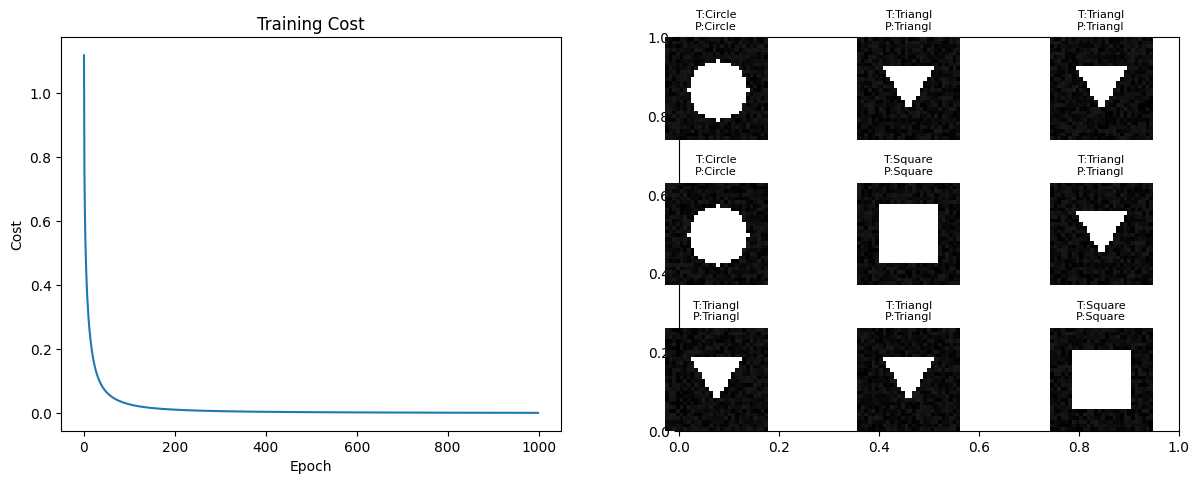

In [4]:
class ActivationFunctions:
    '''Custom activation functions'''
    @staticmethod
    def sigmoid(x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_derivative(x):
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)
    
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    @staticmethod
    def relu_derivative(x):
        return (x > 0).astype(float)
    
    @staticmethod
    def tanh(x):
        return np.tanh(x)
    
    @staticmethod
    def tanh_derivative(x):
        return 1 - np.tanh(x)**2
    
    @staticmethod
    def softmax(x):
        #subtract max for numerical stability
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
class ANN:
    '''Custom Artificial neural network'''
    def __init__(self, layer_sizes: List[int], activation: str = 'sigmoid'):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.activation = activation

        #weights and biases initializations
        self.weights = []
        self.biases = []

        for i in range(self.num_layers - 1):#iterating until output layer is reached
            #assigning weights on each nodes from input to output layer
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(w)
            self.biases.append(b)
        
    def fwd_propagate(self, X):
        self.activations = [X] #fro storing output of each layer
        self.z_values = [] #for storing linear combnination z = X*weight + bias

        for i in range(self.num_layers - 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)

            if i == self.num_layers - 2: #for output layer
                if self.layer_sizes[-1] > 1: #if the classification is multiclass, softmax is used else sigmoid
                    a = ActivationFunctions.softmax(z)
                else:
                    a = ActivationFunctions.sigmoid(z)
            else:
                if self.activation == 'sigmoid':
                    a = ActivationFunctions.sigmoid(z)
                elif self.activation == 'relu':
                    a = ActivationFunctions.relu(z)
                elif self.activation == 'tanh':
                    a = ActivationFunctions.tanh(z)
                else:
                    a = ActivationFunctions.sigmoid(z)

            self.activations.append(a)
        return self.activations[-1] #output of the network for input X
    
    def bwd_propagate(self, X, y):
        '''Backward propagation for gradient computing'''
        m = X.shape[0] #No of samples in input

        #initialization of gradients
        dW = [np.zeros_like(w) for w in self.weights]
        db = [np.zeros_like(b) for b in self.biases]

        #derivative loss wrt output
        if self.layer_sizes[-1] > 1:
            dz =  self.activations[-1] - y
        else:
            dz = self.activations[-1] - y
        '''if else is put as to separate the multiclass softmax with binary
        Here it might be same but it can be different for different conditons'''
        for i in range(self.num_layers - 2, -1, -1): #backward iterations
            dW[i] = np.dot(self.activations[i].T, dz) / m
            db[i] = np.sum(dz, axis=0, keepdims=True) / m

            if i > 0: #derivative calculation for hidden layers
                if self.activation == 'sigmoid':
                    dz = np.dot(dz, self.weights[i].T) * ActivationFunctions.sigmoid_derivative(self.z_values[i-1])
                elif self.activation == 'relu':
                    dz = np.dot(dz, self.weights[i].T) * ActivationFunctions.relu_derivative(self.z_values[i-1])
                elif self.activation == 'tanh':
                    dz = np.dot(dz, self.weights[i].T) * ActivationFunctions.tanh_derivative(self.z_values[i-1])

        return dW, db
    
    def train(self, X, y, epochs: int = 1000, learning_rate: float = 0.01, verbose: bool = True):
        '''Training of neural network'''
        costs = []

        for epoch in range(epochs):
            predictions = self.fwd_propagate(X) #produces predicted outputs from inputs by forward proapagation

            if self.layer_sizes[-1] > 1: #for multiclass (softmax + cross-entropy)
                cost = -np.mean(np.sum(y * np.log(predictions + 1e-8), axis=1))
            else: #for binary (sigmoid + Binary cross-entropy)
                cost  = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
            
            costs.append(cost)

            dW, db = self.bwd_propagate(X, y)

            for i in range(len(self.weights)):
                self.weights[i] -= learning_rate * dW[i]
                self.biases[i] -= learning_rate * db[i]
                #update weights and biases adn move the parameters to the direction of reduced cost
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost: .4f}")
            
        return costs
    
    def predict(self, X):
        predictions = self.fwd_propagate(X)
        if self.layer_sizes[-1] > 1:
            return np.argmax(predictions, axis=1)
        else:
            return (predictions > 0.5).astype(int)
        
    def prediction_probability(self, X):
        return self.fwd_propagate(X)
    
def create_dataset():
    def draw_circle(size=28, center=None, radius=8):
        if center is None:
            center = (size // 2, size // 2)
        img = np.zeros((size, size))
        y, x = np.ogrid[:size, :size]
        mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2
        img[mask] = 1
        return img
    
    def draw_square(size=28, center=None, length=16):
        if center is None:
            center = (size // 2, size // 2)
        img = np.zeros((size, size))
        half_side =  length // 2
        y1, y2 = max(0, center[1] - half_side), min(size, center[1] + half_side)
        x1, x2 = max(0, center[0] - half_side), min(size, center[0] + half_side)
        img[y1:y2, x1:x2] = 1
        return img
    
    def draw_triangle(size=28, center=None, width=16):
        if center is None:
            center = (size // 2, size // 2)
        img = np.zeros((size, size))
        height = int((np.sqrt(3) / 2) * width)

        for i in range(height):
            intermediate_width = int(width * i / height)
            y = center[1] + height//2 - i
            if 0 <= y < size:
                x1 = max(0, center[0] - intermediate_width//2)
                x2 = min(size, center[0] + intermediate_width//2)
                img[y, x1:x2] = 1
        return img
    
    X = []
    y = []

    for _ in range(200):
        circle = draw_circle()
        noise = np.random.random(circle.shape) * 0.1
        circle = np.clip(circle + noise, 0, 1)
        X.append(circle.flatten())
        y.append([1, 0, 0])

        square = draw_square()
        noise = np.random.random(square.shape) * 0.1
        square = np.clip(square + noise, 0, 1)
        X.append(square.flatten())
        y.append([0, 1, 0])

        triangle = draw_triangle()
        noise = np.random.random(triangle.shape) * 0.1
        triangle = np.clip(triangle + noise, 0, 1)
        X.append(triangle.flatten())
        y.append([0, 0, 1])
    return np.array(X), np.array(y)

def shape_classification_test():
    '''Using ANN to classify images'''
    str2 = 'Shape Classification With ANN'
    print(str2.center(80, '='))

    print('Creating dataset of different shapes')
    X, y = create_dataset()

    indice = np.random.permutation(len(X))
    train_Size = int(0.8 * len(X))
    train_idx, test_idx = indice[:train_Size], indice[train_Size:]

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(f'Total samples trained = {len(X_train)}')
    print(f'Total samples tested = {len(X_test)}')

    print("\nTraining ANN...")
    neural = ANN([784, 64, 32, 3], activation='relu')
    costs = neural.train(X_train, y_train, epochs=1000, learning_rate=0.01)

    train_prediction = neural.predict(X_train)
    test_prediction = neural.predict(X_test)

    train_accuracy = np.mean(train_prediction == np.argmax(y_train, axis=1))
    test_accuracy = np.mean(test_prediction == np.argmax(y_test, axis=1))

    print(f'\nTraining Accuracy: {train_accuracy:.4f}')
    print(f'\nTest Accuracy: {test_accuracy:.4f}')

    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(costs)
    plt.title('Training Cost')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')

    plt.subplot(1, 2, 2)
    sample_idx =  np.random.choice(len(X_test), 9)
    class_names = ['Circle', 'Square', 'Triangle']
    subplot_positions = [4, 5, 6, 10, 11, 12, 16, 17, 18]
    for i, idx in enumerate(sample_idx):
        plt.subplot(3, 6, subplot_positions[i])
        img = X_test[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        true_label = class_names[np.argmax(y_test[idx])]
        predicted_label = class_names[test_prediction[idx]]
        plt.title(f'T:{true_label[:7]}\nP:{predicted_label[:7]}', fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

shape_classification_test()

Simple Convolution Neural Network for MNIST

In [ ]:
class ConvolutionalLayer:
    '''Creating a convolutional layer'''
    def __init__(self, filter_num, filter_size, input_channel=1, stride=1, padding=0):
        self.filter_num = filter_num
        self.filter_size = filter_size
        self.input_channel = input_channel
        self.stride = stride
        self.padding = padding
        #Initialization of filter with XAvier initialization
        self.filters = np.random.randn(filter_num, input_channel, filter_size, filter_size) * np.sqrt(2.0 / (filter_size * filter_size))
        self.biases = np.zeros(filter_num)

    def fwd(self, input_data):
        '''Forward passing through Convolutional Layer'''
        self.input_data = input_data

        #handle different input layers
        if len(input_data.shape) == 3:
            #when the input_data has batch_size, height, width only
            batch_size, input_height, input_width = input_data.shape
            input_data = input_data.reshape(batch_size, 1, input_height, input_width) #Adding a channel
            input_channel = 1
        else:
            #when input_data has channel as well
            batch_size, input_channel, input_height, input_width = input_data.shape
        
        #Calculating the output dimensions
        output_height = (input_height + 2 * self.padding - self.filter_size) // self.stride + 1
        output_width = (input_width + 2 * self.padding - self.filter_size) // self.stride + 1
        #Initialization of the output
        output = np.zeros((batch_size, self.filter_num, output_height, output_width))

        if self.padding > 0: #if already padded
            pad_input = np.pad(input_data, ((0, 0), (0, 0), (self.padding, self.padding), (self.padding, self.padding)), mode='constant')
        else:
            pad_input = input_data
        
        #convolution
        for b in range(batch_size):
            